# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 8: Analiza danych przestrzennych z wykorzystaniem dedykowanych pakietów (część 2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    area = (x_lim[-1] - x_lim[0])*(y_lim[-1] - y_lim[0])
    number_of_points = np.random.poisson(intensity*area)
    x = np.random.uniform(x_lim[0], x_lim[-1], number_of_points)
    y = np.random.uniform(y_lim[0], y_lim[-1], number_of_points)
    points = pd.DataFrame({"X" : x, "Y" : y})
    return points
    
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    x_lim_modified = x_lim[:]
    y_lim_modified = y_lim[:]
    x_lim_modified[0] -= 4*cluster_sigma
    x_lim_modified[1] += 4*cluster_sigma
    y_lim_modified[0] -= 4*cluster_sigma
    y_lim_modified[1] += 4*cluster_sigma
    poisson_points = homogeneous_poisson_on_rectangle(parent_intensity, x_lim_modified, y_lim_modified)
    thomas_points = pd.DataFrame(columns = ["X", "Y"])
    for index, points in poisson_points.iterrows():
        number_of_points = np.random.poisson(mean_cluster_size)
        x = np.random.normal(points["X"], cluster_sigma, number_of_points)
        y = np.random.normal(points["Y"], cluster_sigma, number_of_points)
        temp_points = pd.DataFrame({"X" : x, "Y" : y})
        thomas_points = pd.concat([thomas_points, temp_points])
    thomas_points = thomas_points[(x_lim[0] < thomas_points["X"]) & (thomas_points["X"] < x_lim[1]) & (y_lim[0] < thomas_points["Y"]) & (thomas_points["Y"] < y_lim[1])]
    return thomas_points

### Wczytanie danych

Załączone do notatnika pliki zawierają dane niezbędne do wykonania zadań oraz dane wykorzystywane w zawartych w notatniku automatycznych testach. W celu wczytania danych do notatnika umieść pliki w tym samym folderze, w którym znajduje się notatnik.

In [4]:
# Wczytanie danych
data = gpd.read_file("data.zip", encoding="utf-8")
test_data_1 = gpd.read_file("test_data_1.zip", encoding="utf-8")
test_data_2 = gpd.read_file("test_data_2.zip", encoding="utf-8")
test_points = gpd.read_file("test_points.zip", encoding="utf-8")

### Zadanie 1: Przygotowanie danych (7 pkt)

#### a) Przygotowanie danych wejściowych

Wykorzystując dane zawarte w zmiennej `data` przygotuj następujące tablice:

1) Tablica `powiaty` zawierająca następujące kolumny:
    - "Nazwa" - nazwy powiatów
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica `wojewodztwa` zawierająca następujące kolumny:
    - "Nazwa" - nazwy województw
    - "geometry" - geometria obiektów
<br/>
<br/>
3) Tablica `kraj` zawierająca następujące kolumny:
    - "Nazwa" - nazwa kraju
    - "geometry" - geometria obiektu


Wyświetl przygotowane tablice.

Uwagi do wykonania zadania:
 - Podczas konstrukcji tablic zawierających geometrie województw i kraju wykorzystaj funkcję `geopandas.GeoDataFrame.dissolve()`.

In [5]:
# Powiaty
powiaty = gpd.GeoDataFrame({'Nazwa': data["pow"], 'geometry': data["geometry"]})
powiaty

,Nazwa,geometry
0,ropczycko-sędziszowski,"POLYGON ((692305.365 260282.248, 692313.646 26..."
1,łosicki,"POLYGON ((753920.175 497017.076, 753918.822 49..."
2,piaseczyński,"POLYGON ((644442.384 473992.041, 644345.678 47..."
3,radomski,"POLYGON ((638056.482 404421.246, 638059.412 40..."
4,sierpecki,"POLYGON ((534236.749 555932.727, 534235.027 55..."
...,...,...
375,nowodworski,"POLYGON ((521445.985 722541.335, 521523.278 72..."
376,jaworski,"POLYGON ((303544.254 353195.337, 303547.016 35..."
377,węgrowski,"POLYGON ((702854.223 532567.782, 702853.911 53..."
378,wejherowski,"POLYGON ((430377.866 773965.783, 430351.853 77..."


In [6]:
# Komórka testowa
assert type(powiaty) == gpd.geodataframe.GeoDataFrame
assert powiaty.shape == (380, 2)
assert list(powiaty.columns) == ['Nazwa', 'geometry']

In [7]:
# Województwa
wojewodztwa = gpd.GeoDataFrame({'Nazwa': data["woj"], 'geometry': data["geometry"]}).dissolve(by = "Nazwa", as_index = False)
wojewodztwa

,Nazwa,geometry
0,dolnośląskie,"POLYGON ((314611.150 311051.839, 314601.470 31..."
1,kujawsko-pomorskie,"POLYGON ((478562.463 506967.539, 478548.952 50..."
2,lubelskie,"POLYGON ((741864.722 286667.036, 741870.576 28..."
3,lubuskie,"POLYGON ((229163.332 402782.450, 229144.276 40..."
4,mazowieckie,"POLYGON ((585701.782 466338.954, 585672.494 46..."
5,małopolskie,"POLYGON ((586410.706 163650.516, 586410.872 16..."
6,opolskie,"POLYGON ((432817.512 256749.768, 432795.398 25..."
7,podkarpackie,"POLYGON ((714304.962 168868.919, 714268.355 16..."
8,podlaskie,"POLYGON ((732344.671 544449.422, 732354.868 54..."
9,pomorskie,"POLYGON ((398449.594 638549.011, 398420.288 63..."


In [8]:
# Komórka testowa
assert type(wojewodztwa) == gpd.geodataframe.GeoDataFrame
assert wojewodztwa.shape == (16, 2)
assert list(wojewodztwa.columns) == ['Nazwa', 'geometry']

In [9]:
# Kraj
kraj = gpd.GeoDataFrame({'Nazwa': "Polska", 'geometry': data["geometry"]}).dissolve(by = "Nazwa", as_index = False)
kraj

,Nazwa,geometry
0,Polska,"POLYGON ((314574.250 311049.909, 314544.080 31..."


In [10]:
# Komórka testowa
assert type(kraj) == gpd.geodataframe.GeoDataFrame
assert kraj.shape == (1, 2)
assert list(kraj.columns) == ['Nazwa', 'geometry']

#### b) Wizualizacja danych wejściowych

Zwizualizuj dane wejściowe na pojedynczym wykresie tak by poszczególnej jednostki administracyjne nie posiadały wypełnienia, a ich granice były oznaczone coraz grubszymi i ciemniejszymi liniami wraz ze wzrostem ważności jednostek. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

Text(0.5, 1.0, 'Mapa jednostek adiministracyjnych w Polsce, odzworowanie kartograficzne EPSG:2180')

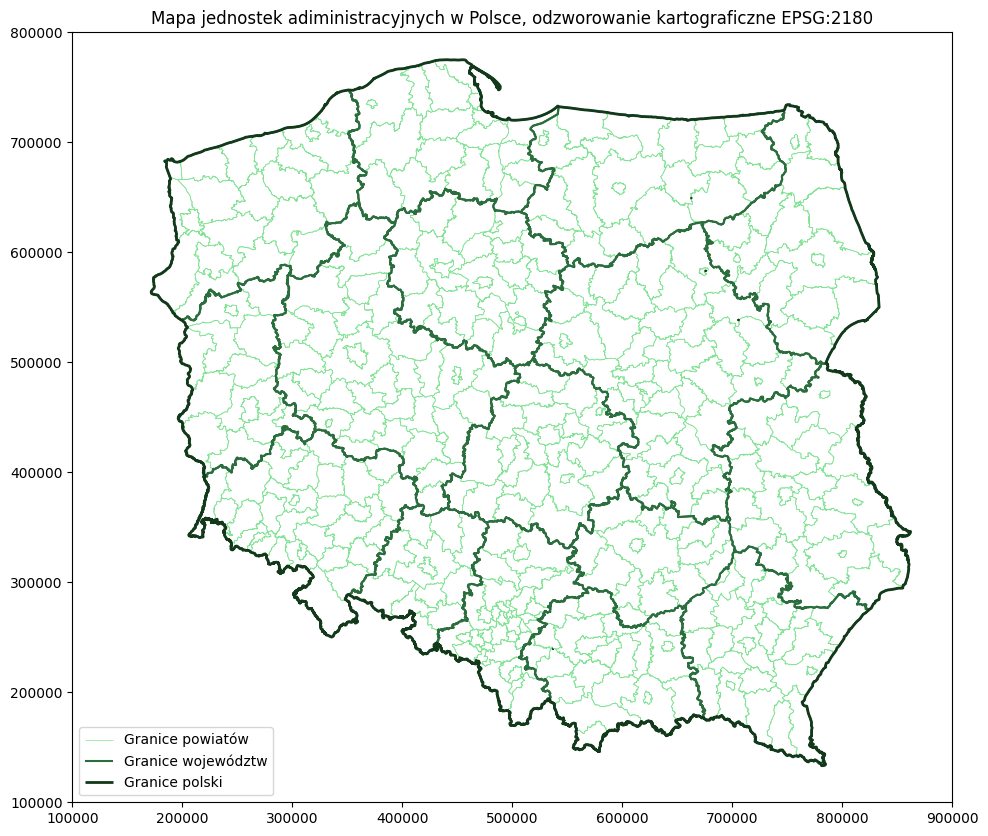

In [11]:
figure,axes = plt.subplots(figsize = (15,10))
axes.axis("square")
axes.set_xlim([100000,900000])
axes.set_ylim([100000,800000])
powiaty.boundary.plot(ax = axes, color = "#80E393", linewidth = 0.5)
wojewodztwa.boundary.plot(ax = axes, color = "#2B6E3D", linewidth = 1.5)
kraj.boundary.plot(ax = axes, color = "#12391A", linewidth = 2.0)
axes.legend(["Granice powiatów", "Granice województw", "Granice polski"], loc = "lower left")
axes.set_title("Mapa jednostek adiministracyjnych w Polsce, odzworowanie kartograficzne EPSG:2180")

### Zadanie 2: Adaptacja funkcji generującej proces punktowy w obrębie prostokąta (10 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `adapted_thomas_on_polygon()`, która będzie wykorzystywała funkcję `thomas_on_rectangle()` przygotową w ramach pierwszego zestawu zadań oraz możliwości pakietu geopandas do generowania procesu Thomasa w obrębie dowolnego poligonu.

Uwagi do wykonania zadania:
- Podczas wykonania zadania wykorzystaj następujące funkcje i własności: `geopandas.GeoSeries.bounds`, `geopandas.GeoSeries.from_xy()`, `geopandas.GeoSeries.set_crs()` i `geopandas.GeoSeries.within()`.

In [12]:
def adapted_thomas_on_polygon(parent_intensity, mean_cluster_size, cluster_sigma, polygon):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    polygon: GeoDataFrame
        Pojedynczy wiersz tablicy GeoPandas, zawierający w kolumnie "geometry" poligon, na którym mają zostać wygenerowane punkty.
    
    Returns
    -------
    points: GeoDataFrame
        Tablica geopandas zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej polygon.
    """
    xlim=[polygon.bounds["minx"][polygon.index[0]],polygon.bounds["maxx"][polygon.index[0]]]
    ylim=[polygon.bounds["miny"][polygon.index[0]],polygon.bounds["maxy"][polygon.index[0]]]
    thomas_points = thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, xlim, ylim)
    points=gpd.GeoSeries.from_xy(thomas_points["X"],thomas_points["Y"])
    points.set_crs(polygon.crs,inplace=True)
    bool = points.within(polygon.geometry[polygon.index[0]])
    points = points[bool]
    points = gpd.GeoDataFrame({"geometry":points})
    return points

In [13]:
# Komórka testowa
test_points_1 = adapted_thomas_on_polygon(7*10**(-10), 25, 7*10**3, test_data_1)
assert type(test_points_1) == gpd.GeoDataFrame
assert list(test_points_1.columns) == ["geometry"]
assert np.all(test_points_1.within(test_data_1["geometry"][0]))

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowaną funkcję do wygenerowania rozkładu punktów o intensywności procesu macierzystego $5 \cdot 10^{-10} pkt/m^2$, oczekiwanej liczebności klastrów 50 i odchyleniu standardowym klastrów $7.5 \cdot 10^3$ na obszarze województwa mazowieckiego.

Zwizualizuj wyniki w postaci wykresu punktowego nałożonego na kontury granic województw. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

<Axes: title={'center': 'Wizualizacja danych'}, xlabel='X', ylabel='Y'>

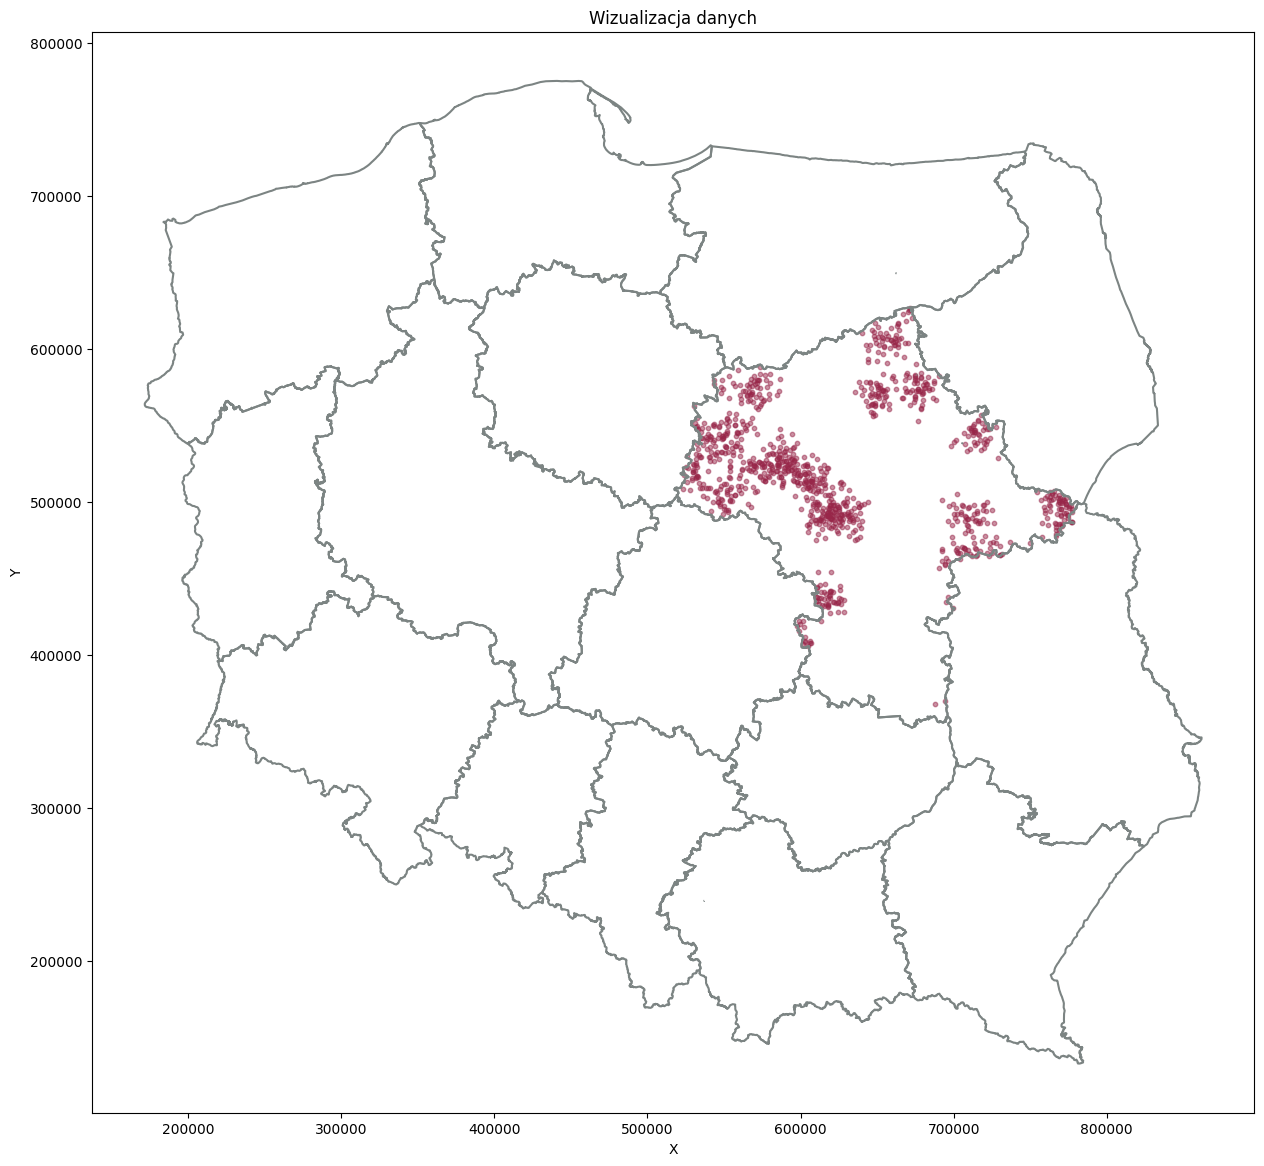

In [14]:
points = adapted_thomas_on_polygon(5*10**(-10), 50, 7.5*10**3, wojewodztwa[wojewodztwa["Nazwa"]=="mazowieckie"])
figure, ax = plt.subplots(1,1,figsize=(15,15))

ax.set_title("Wizualizacja danych")
ax.set_xlabel("X")
ax.set_ylabel("Y")
wojewodztwa.boundary.plot(color="#7C8483",ax=ax,linewidth=1.5)
points.plot(color="#982649",ax=ax,alpha=0.5,markersize=10)

### Zadanie 3: Generowanie procesów punktowych z wykorzystaniem dedykowanych funkcji (10 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcje `homogeneous_poisson_on_polygon()` oraz `clustered_poisson_on_polygon()`, które będzą generować odpowiednio jednorodny proces Poissona oraz sklasteryzowany proces punktowy Poissona (proces Neymana-Scotta) w obrębie dowolnego poligonu.

Uwagi do wykonania zadania:
 - Projektując funkcje skorzystaj z funkcji `geopandas.GeoSeries.sample_points()` oraz `geopandas.GeoSeries.explode()`.

In [15]:
def homogeneous_poisson_on_polygon(intensity, polygon):
    number_of_points = int(intensity * polygon.area)
    points = polygon.sample_points(number_of_points, method='uniform')
    return gpd.GeoDataFrame({'geometry': points}).explode(index_parts=True)
    
def clustered_poisson_on_polygon(parent_intensity, daughter_intensity, cluster_radius, polygon):
    points = polygon.sample_points(method='cluster_poisson', size=int(daughter_intensity * polygon.area), n_seeds=int(parent_intensity * polygon.area), cluster_radius=cluster_radius)
    return gpd.GeoDataFrame({'geometry': points}).explode(index_parts=True)

In [16]:
# Komórka testowa
test_points_2 = homogeneous_poisson_on_polygon(7*10**(-9), test_data_1)
assert type(test_points_2) == gpd.GeoDataFrame
assert list(test_points_2.columns) == ["geometry"]
assert np.all(test_points_2.within(test_data_1["geometry"][0]))

test_points_3 = clustered_poisson_on_polygon(6*10**(-10), 9*10**(-9), 20000, test_data_1)
assert type(test_points_3) == gpd.GeoDataFrame
assert list(test_points_3.columns) == ["geometry"]
assert np.all(test_points_3.within(test_data_1["geometry"][0]))

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowane funkcje do wygenerowania następujących rozkładów punkotwych:

Rozkład 1 - jednorodny proces Poissona:
 - intensywność procesu: $5 \cdot 10^{-9} pkt/m^2$ 
 - obszar: Polska
 
Rozkład 2 - sklasteryzowany proces Poissona:
 - intensywność procesu macierzystego: $0.75 \cdot 10^{-10} pkt/m^2$ 
 - intensywność procesu: $2.5 \cdot 10^{-9} pkt/m^2$ 
 - promień klastra: $50 km$
 - obszar: Polska 
 
Rozkład 3 - jednorodny proces Poissona:
 - intensywność procesu: $6 \cdot 10^{-9} pkt/m^2$ 
 - obszar: Wielkopolska

Przedstaw wygenerowane rozkłady w postaci wykresów punktowego nałożonych na kontury granic kraju (rozkłady 1, 2) lub na kontury granic województw (rozkład 3). Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x3). Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

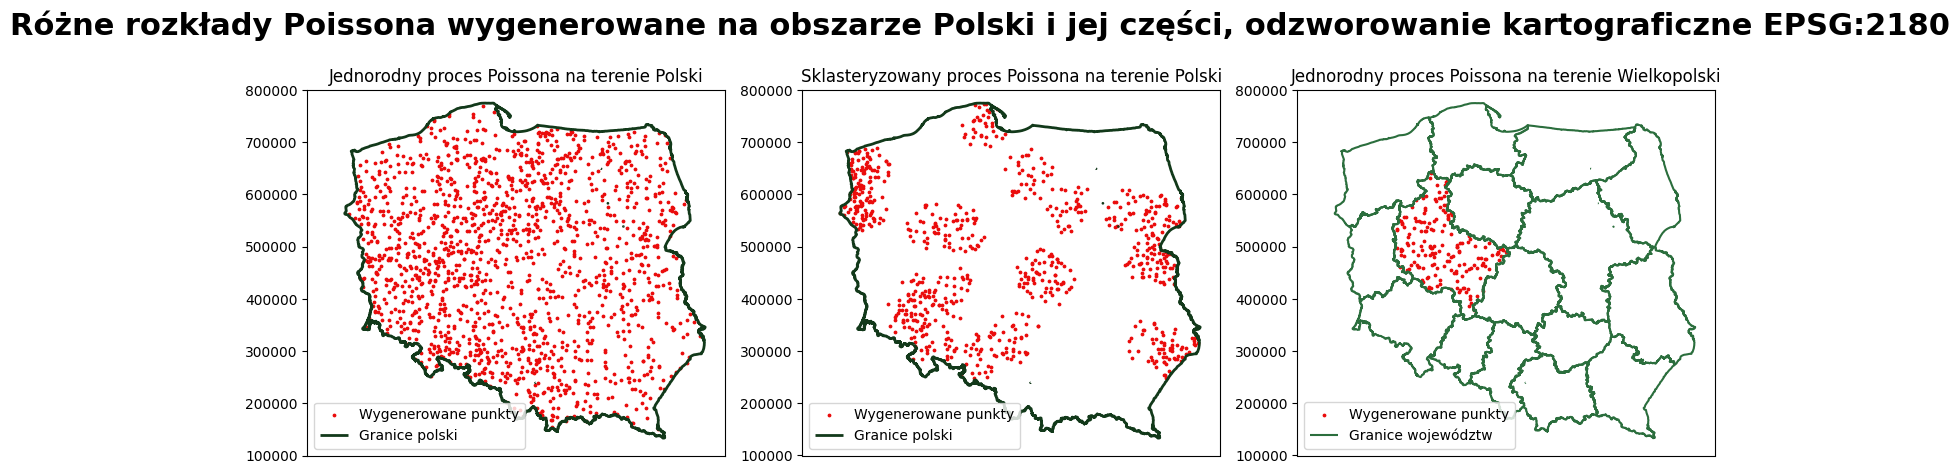

In [17]:
homogeneous_poisson_poland = homogeneous_poisson_on_polygon(5*10**(-9), kraj.geometry)
clustered_poisson_poland = clustered_poisson_on_polygon(0.75*10**(-10), 2.5*10**(-9), 50000, kraj.geometry)
homogeneous_poisson_wielkopolska = homogeneous_poisson_on_polygon(6*10**(-9), wojewodztwa.loc[wojewodztwa["Nazwa"] == "wielkopolskie"].geometry)

figure,axes = plt.subplots(1,3, figsize = (15,5))
figure.suptitle(t="Różne rozkłady Poissona wygenerowane na obszarze Polski i jej części, odzworowanie kartograficzne EPSG:2180", size = 22, weight = "bold")

axes[0].axis("square")
axes[0].set_xlim([100000,900000])
axes[0].set_ylim([100000,800000])
homogeneous_poisson_poland.plot(ax = axes[0], color = "#EA0C0C", markersize = 3)
kraj.boundary.plot(ax = axes[0], color = "#12391A", linewidth = 2.0)
axes[0].legend(["Wygenerowane punkty", "Granice polski"], loc = "lower left")
axes[0].set_title("Jednorodny proces Poissona na terenie Polski")
axes[0].xaxis.set_major_locator(mpl.ticker.NullLocator())

axes[1].axis("square")
axes[1].set_xlim([100000,900000])
axes[1].set_ylim([100000,800000])
clustered_poisson_poland.plot(ax = axes[1], color = "#EA0C0C", markersize = 3)
kraj.boundary.plot(ax = axes[1], color = "#12391A", linewidth = 2.0)
axes[1].legend(["Wygenerowane punkty", "Granice polski"], loc = "lower left")
axes[1].set_title("Sklasteryzowany proces Poissona na terenie Polski")
axes[1].xaxis.set_major_locator(mpl.ticker.NullLocator())

axes[2].axis("square")
axes[2].set_xlim([100000,900000])
axes[2].set_ylim([100000,800000])
homogeneous_poisson_wielkopolska.plot(ax = axes[2], color = "#EA0C0C", markersize = 3)
wojewodztwa.boundary.plot(ax = axes[2], color = "#2B6E3D", linewidth = 1.5)
axes[2].legend(["Wygenerowane punkty", "Granice województw"], loc = "lower left")
axes[2].set_title("Jednorodny proces Poissona na terenie Wielkopolski")
axes[2].xaxis.set_major_locator(mpl.ticker.NullLocator())

figure.tight_layout()

### Zadanie 4: Badanie intensywności procesów punktowych metodą szacowania lokalnego  (8 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie podobszarów.

Uwagi do wykonania zadania:
- Projektując funkcje skorzystaj z funkcji `geopandas.GeoSeries.within()` oraz własności `geopandas.GeoSeries.area`.
- W części zadania dotyczącej funkcji obliczającej intensywność procesu nie należy dublować kodu napisanego w funkcji zliczającej punkty w obrębie podobszarów, a jedynie wywołać przygotowaną wcześniej funkcję `point_count_on_subregions()`.

In [18]:
def point_count_on_subregions(points, subregions):
    points = points.to_crs(subregions.crs) #ten sam układ
    points_count = subregions.geometry.apply(lambda geometry: points.within(geometry).sum())
    return points_count
    
def intensity_on_subregions(points, subregions):
    return point_count_on_subregions(points, subregions) / subregions.area

In [19]:
# Komórka testowa
test_intensity = intensity_on_subregions(test_points, test_data_2)
assert type(test_intensity) == pd.Series
assert np.isclose(test_intensity.min(), 0.0)
assert np.isclose(test_intensity.max(), 9.190361956135075e-09)
assert np.isclose(test_intensity.mean(), 2.495976569712346e-09)

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowane funkcje do zbadania intensywności rozkładów punktów wygenerowanych w poprzednim zadaniu w obrębie całego kraju na obszarze poszczegolnych powiatów.

Przedstaw wyniki analizy graficznie w postaci kartogramów z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x2). Dla wszystkich histogramów ustaw tę samą skalę kolorów z identycznym zakresem wartości ustalonym na podstawie minimalnej i maksymalnej wartości intensywności wyznaczonej dla kompletu analizowanych rozkładów. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

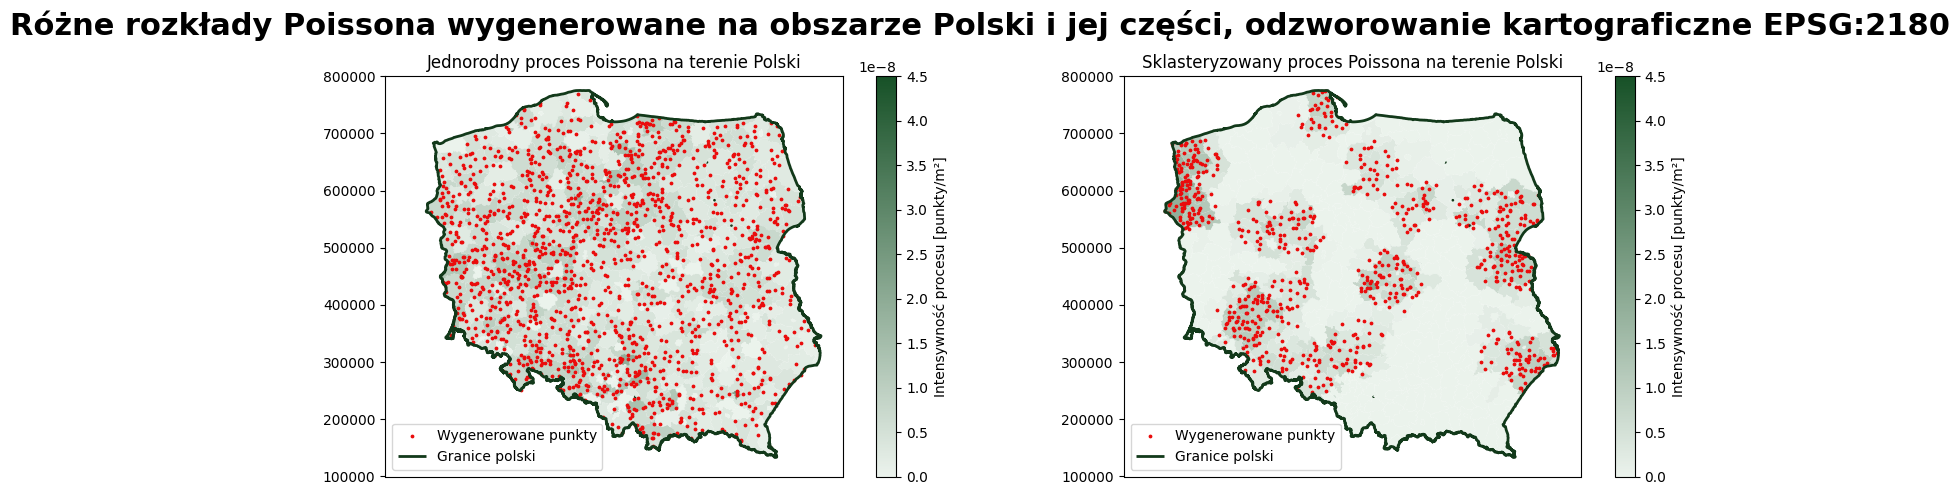

In [20]:
powiaty['intensity_homogeneous'] = intensity_on_subregions(homogeneous_poisson_poland, powiaty)
powiaty['intensity_clustered'] = intensity_on_subregions(clustered_poisson_poland.geometry, powiaty)

figure,axes = plt.subplots(1,2, figsize = (15,5))
figure.suptitle(t="Różne rozkłady Poissona wygenerowane na obszarze Polski i jej części, odzworowanie kartograficzne EPSG:2180", size = 22, weight = "bold")
cmap = sns.color_palette("light:#175127", as_cmap=True)

axes[0].axis("square")
axes[0].set_xlim([100000,900000])
axes[0].set_ylim([100000,800000])
powiaty.plot(ax=axes[0], column='intensity_homogeneous', cmap=cmap, legend=True, legend_kwds={"label" : "Intensywność procesu [punkty/m\u00b2]"}, vmax = 4.5*10**(-8))
homogeneous_poisson_poland.plot(ax = axes[0], color = "#EA0C0C", markersize = 3)
kraj.boundary.plot(ax = axes[0], color = "#12391A", linewidth = 2.0)
axes[0].legend(["Wygenerowane punkty", "Granice polski"], loc = "lower left")
axes[0].set_title("Jednorodny proces Poissona na terenie Polski")
axes[0].xaxis.set_major_locator(mpl.ticker.NullLocator())

axes[1].axis("square")
axes[1].set_xlim([100000,900000])
axes[1].set_ylim([100000,800000])
powiaty.plot(ax=axes[1], column='intensity_clustered', cmap=cmap, legend=True, legend_kwds={"label" : "Intensywność procesu [punkty/m\u00b2]"}, vmax = 4.5*10**(-8))
clustered_poisson_poland.plot(ax = axes[1], color = "#EA0C0C", markersize = 3)
kraj.boundary.plot(ax = axes[1], color = "#12391A", linewidth = 2.0)
axes[1].legend(["Wygenerowane punkty", "Granice polski"], loc = "lower left")
axes[1].set_title("Sklasteryzowany proces Poissona na terenie Polski")
axes[1].xaxis.set_major_locator(mpl.ticker.NullLocator())

figure.tight_layout()